In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Upwork/Kaleem/
!ls

/content/drive/MyDrive/Upwork/Kaleem
10.jpg			   inp.jpg		      target.jpg
10_v3.jpg		   inp_strong.jpg	      tar.jpg
13.jpg			   inp_weak.jpg		      test_images.pkl
13_v3.jpg		   JPCLN077.PNG		      test.jpg
14.jpg			   model		      unet
21.jpg			   org1.jpg		      unet.png
2.jpg			   predictions.pkl	      Untitled1.ipynb
2_v3.jpg		   pred.jpg		      weak_augmented_imgs.pkl
All247images		   pseudo1.jpg		      weak_predictions.pkl
augmented_strong.jpg	   segmentation		      X_test.pkl
augmented_strong_pred.jpg  Segmentation01	      X_train.pkl
augmented_weak.jpg	   slides.gslides	      y_test.pkl
augmented_weak_pred.jpg    strong_augmented_imgs.pkl  y_train.pkl
code.ipynb		   strong_predictions.pkl
inp1.jpg		   tar1.jpg


In [3]:
import os

org_base_path='segmentation/org_train/'
lab_base_path='segmentation/label_train/'

print(len(os.listdir(org_base_path)))

os.listdir(org_base_path)[:3]

199


['case061.bmp', 'case069.bmp', 'case044.bmp']

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm

X_train=[]
y_train=[]
X_test=[]
y_test=[]

with tqdm (total=len(os.listdir(org_base_path))) as pbar:
  for i,img_name in enumerate(os.listdir(org_base_path)):
    img=cv2.imread(org_base_path+img_name)
    img=cv2.resize(img,(256,256))
    try:
      img_name=img_name.split('.')[0]+"_label.png"
      img1=cv2.imread(lab_base_path+img_name)
      img1=cv2.resize(img1,(256,256))
      X_train.append(img)
      y_train.append(img1)
    except Exception as e:
      print("EXC: ", e)
      pass
    pbar.update(1)


100%|██████████| 199/199 [00:43<00:00,  4.57it/s]


In [5]:
X_train=np.array(X_train)
y_train=np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(199, 256, 256, 3)
(199, 256, 256, 3)


In [6]:
org_base_path='segmentation/org_test/'
lab_base_path='segmentation/label_test/'

with tqdm (total=len(os.listdir(org_base_path))) as pbar:
  for i,img_name in enumerate(os.listdir(org_base_path)):
    img=cv2.imread(org_base_path+img_name)
    img=cv2.resize(img,(256,256))
    try:
      img_name=img_name.split('.')[0]+"_label.png"
      img1=cv2.imread(lab_base_path+img_name)
      img1=cv2.resize(img1,(256,256))
      X_test.append(img)
      y_test.append(img1)
    except Exception as e:
      print("EXC: ", e)
      pass
    pbar.update(1)

X_test=np.array(X_test)
y_test=np.array(y_test)

print(X_test.shape)
print(y_test.shape)

100%|██████████| 48/48 [00:18<00:00,  2.58it/s]

(48, 256, 256, 3)
(48, 256, 256, 3)


In [7]:
os.listdir(org_base_path)[:2]

['case207.bmp', 'case227.bmp']

(256, 256, 3)


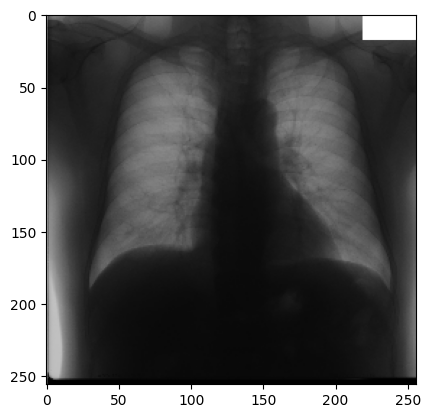

(256, 256, 3)


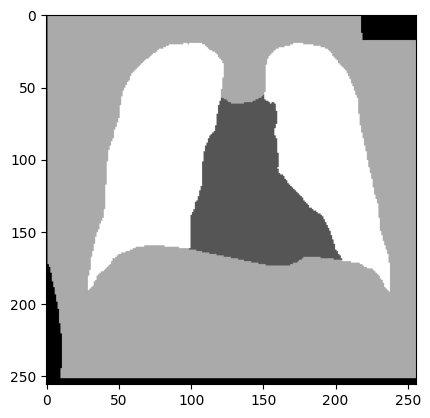

In [8]:
# plot a sample image and it's label
img = cv2.imread(org_base_path+'case207.bmp')
print(img.shape)
plt.imshow(img, cmap = "gray")

plt.show()

img = cv2.imread(lab_base_path+'case207_label.png')
print(img.shape)
plt.imshow(img, cmap = "gray")

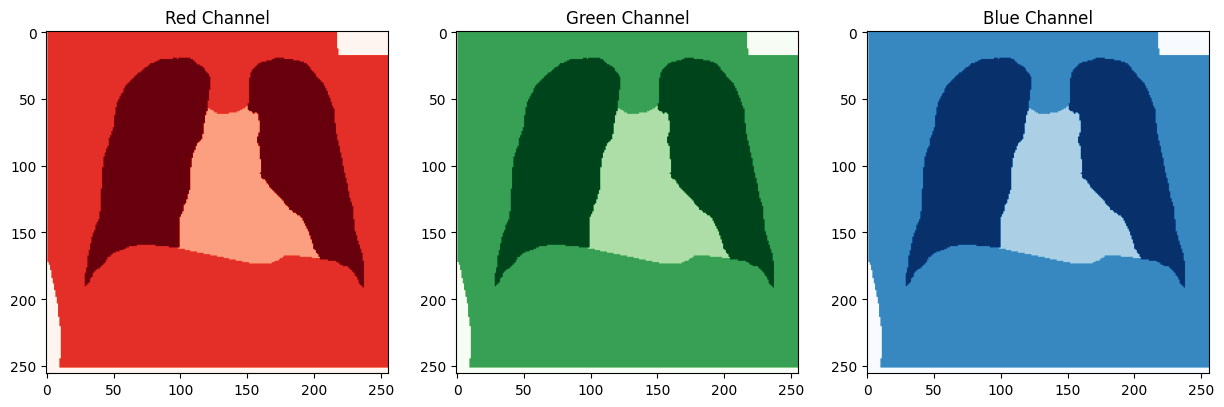

In [17]:
red_channel = img[:,:,0]
green_channel = img[:,:,1]
blue_channel = img[:,:,2]

# Plot each channel separately
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(red_channel, cmap='Reds')
axs[0].set_title('Red Channel')
axs[1].imshow(green_channel, cmap='Greens')
axs[1].set_title('Green Channel')
axs[2].imshow(blue_channel, cmap='Blues')
axs[2].set_title('Blue Channel')
plt.show()

In [19]:
np.set_printoptions(threshold=np.inf)

red_channel

array([[  0, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
        170, 170, 170, 170, 170, 170, 170, 170, 170

In [9]:
!pip install transformers datasets torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 41.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 

In [10]:
len(X_train)

199

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

# x train will be treated as the labeled set and X_test will be treated as the unlabaled set

X_train=torch.div(torch.tensor(X_train), 255.0)
y_train=torch.div(torch.tensor(y_train), 255.0)
X_test=torch.div(torch.tensor(X_test), 255.0)
y_test=torch.div(torch.tensor(y_test), 255.0)

X_train1 = torch.transpose(X_train, 1, 3)
y_train1 = torch.transpose(y_train, 1, 3)
X_test1 = torch.transpose(X_test, 1, 3)
y_test1 = torch.transpose(y_test, 1, 3)

In [ ]:
y_train[0]

In [ ]:
X_train2 = torch.transpose(X_train1, 1, 3)
y_train2 = torch.transpose(y_train1, 1, 3)
X_test2 = torch.transpose(X_test1, 1, 3)
y_test2 = torch.transpose(y_test1, 1, 3)

In [ ]:
train_dataset = MyDataset(X_train1, y_train1)
test_dataset = MyDataset(X_test1, y_test1)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
X_test2.shape

torch.Size([48, 256, 256, 3])

In [ ]:
import torch
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        # contracting path
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1, stride=2)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=2)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=2)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1, stride=2)
        self.bn4 = nn.BatchNorm2d(512)
        # expansive path
        self.conv_transpose1 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv_transpose2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv6 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.conv_transpose3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.conv7 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.bn7 = nn.BatchNorm2d(64)
        
        self.conv_transpose4 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.conv8 = nn.Conv2d(32, 3, kernel_size=1)

    def forward(self, x):
        # contracting path
        x1 = F.relu(self.bn1(self.conv1(x)))
        x2 = F.relu(self.bn2(self.conv2(x1)))
        x3 = F.relu(self.bn3(self.conv3(x2)))
        x4 = F.relu(self.bn4(self.conv4(x3)))
        
        # expansive path
        x = F.relu(self.conv_transpose1(x4))
        
        x = torch.cat([x, x3], dim=1)
        x = F.relu(self.bn5(self.conv5(x)))
        
        x = F.relu(self.conv_transpose2(x))
        x = torch.cat([x, x2], dim=1)
        
        x = F.relu(self.bn6(self.conv6(x)))
        x = F.relu(self.conv_transpose3(x))
        
        x = torch.cat([x, x1], dim=1)
        x = F.relu(self.bn7(self.conv7(x)))
        
        x = torch.cat([x, x1], dim=1)
        x = F.relu(self.bn7(self.conv7(x)))
        
        x = F.relu(self.conv_transpose4(x))
        #print(x.size())
        
        x = torch.sigmoid(self.conv8(x))
        #print(x.size())
        return x, x4

model = UNet()

optimizer = optim.Adam(model.parameters(), lr=0.001)

criterion = nn.BCELoss()

In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"
import gc
gc.collect()

0

In [ ]:
import time


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

n_epochs = 50

train_losses=[]
val_losses=[]

time_taken=[]

for epoch in range(n_epochs):
    train_loss = 0.0
    model.train()
    for i, (inputs, targets) in enumerate(train_loader):
        t1=time.time()
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.float()  # convert input tensor to float
        targets = targets.float()  # convert input tensor to float
        
        optimizer.zero_grad()
        outputs,_ = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        t2=time.time()
        
        
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    time_taken.append(t2-t1)
    print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, train_loss))

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            inputs = inputs.float()  # convert input tensor to float
            targets = targets.float()  # convert input tensor to float
            
            outputs,_ = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    val_losses.append(test_loss)
    print('Test Loss: {:.4f}'.format(test_loss))

Epoch: 1, Training Loss: 0.6504
Test Loss: 0.6113
Epoch: 2, Training Loss: 0.5615
Test Loss: 0.5934
Epoch: 3, Training Loss: 0.4995
Test Loss: 0.5587
Epoch: 4, Training Loss: 0.4666
Test Loss: 0.5869
Epoch: 5, Training Loss: 0.4535
Test Loss: 0.5012
Epoch: 6, Training Loss: 0.4432
Test Loss: 0.4653
Epoch: 7, Training Loss: 0.4382
Test Loss: 0.4607
Epoch: 8, Training Loss: 0.4315
Test Loss: 0.4523
Epoch: 9, Training Loss: 0.4282
Test Loss: 0.4620
Epoch: 10, Training Loss: 0.4266
Test Loss: 0.4465
Epoch: 11, Training Loss: 0.4252
Test Loss: 0.4744
Epoch: 12, Training Loss: 0.4234
Test Loss: 0.4472
Epoch: 13, Training Loss: 0.4206
Test Loss: 0.4623
Epoch: 14, Training Loss: 0.4192
Test Loss: 0.4541
Epoch: 15, Training Loss: 0.4177
Test Loss: 0.4671
Epoch: 16, Training Loss: 0.4173
Test Loss: 0.4453
Epoch: 17, Training Loss: 0.4162
Test Loss: 0.4539
Epoch: 18, Training Loss: 0.4164
Test Loss: 0.4489
Epoch: 19, Training Loss: 0.4156
Test Loss: 0.4458
Epoch: 20, Training Loss: 0.4143
Test Lo

In [ ]:
import torch
torch.save(model.state_dict(), 'model')
model.load_state_dict(torch.load('model'))
model.eval()

In [ ]:
import torchvision.transforms as transforms

# define the weak and strong augmentations
weak_augmentation = transforms.ColorJitter(brightness=0.4)
strong_augmentation = transforms.Compose([
    transforms.RandomAffine(degrees=10, shear=14),
    transforms.ColorJitter(brightness=0.4)
])



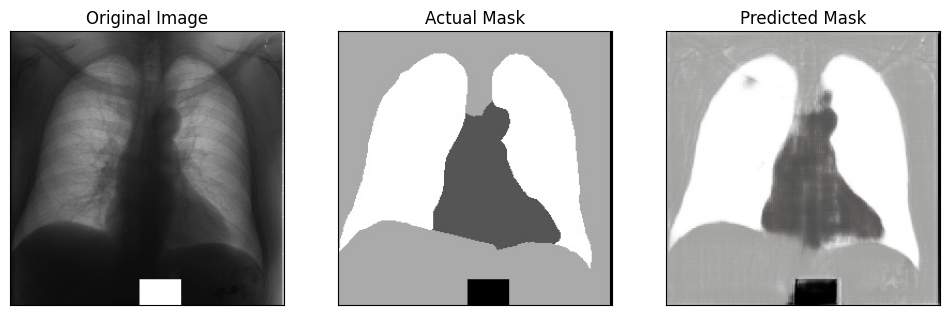

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a sample image from the test dataset
sample_idx = 13

# Generate prediction using the trained model
model.eval()
with torch.no_grad():
    input_tensor = X_test1[sample_idx].unsqueeze(0)
    input_tensor = input_tensor.float()  # convert input tensor to float
    input_tensor = input_tensor.to(device)
    weak_augmented_img = weak_augmentation(input_tensor)
    strong_augmented_img = strong_augmentation(input_tensor)

    output,_ = model(input_tensor)
    input_tensor=torch.transpose(input_tensor, 1, 3).squeeze().cpu().numpy()
    output = torch.transpose(output, 1, 3).squeeze().cpu()
    out=output.numpy()
    
    predicted_mask=out
    target_mask=y_test2[sample_idx].cpu().numpy()

cv2.imwrite("inp.jpg",input_tensor*255)
cv2.imwrite("target.jpg",target_mask*255)
cv2.imwrite("pred.jpg",predicted_mask*255)

x1=cv2.imread("inp.jpg")
x2=cv2.imread("target.jpg")
x3=cv2.imread("pred.jpg")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].imshow(x1)
axs[0].set_title('Original Image')
axs[1].imshow(x2)
axs[1].set_title('Actual Mask')
axs[2].imshow(x3, cmap='gray')
axs[2].set_title('Predicted Mask')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(str(sample_idx)+".jpg")

In [22]:
model.eval()

predictions=[]
weak_predictions=[]
strong_predictions=[]

weak_augmented_imgs=[]
strong_augmented_imgs=[]

test_images=[]

for i,img in enumerate(X_test1):
  with torch.no_grad():
      input_tensor = X_test1[i].unsqueeze(0)
      input_tensor = input_tensor.float()  # convert input tensor to float
      input_tensor = input_tensor.to(device)
      weak_augmented_img = weak_augmentation(input_tensor)
      strong_augmented_img = strong_augmentation(input_tensor)
      
      weak_augmented_imgs.append(torch.transpose(weak_augmented_img, 1, 3).squeeze().cpu().numpy())
      strong_augmented_imgs.append(torch.transpose(strong_augmented_img, 1, 3).squeeze().cpu().numpy())
      test_images.append(torch.transpose(input_tensor, 1, 3).squeeze().cpu().numpy())

      output,_ = model(input_tensor) # prediction
      output = torch.transpose(output, 1, 3).squeeze().cpu()
      out=output.numpy()
      predictions.append(out)

      output,_ = model(weak_augmented_img) # weak augmented prediction
      output = torch.transpose(output, 1, 3).squeeze().cpu()
      out=output.numpy()
      weak_predictions.append(out)

      output,_ = model(strong_augmented_img) # strong augmented prediction
      output = torch.transpose(output, 1, 3).squeeze().cpu()
      out=output.numpy()
      strong_predictions.append(out)


In [23]:
predictions=np.array(predictions)
weak_predictions=np.array(weak_predictions)
strong_predictions=np.array(strong_predictions)
weak_augmented_imgs=np.array(weak_augmented_imgs)
strong_augmented_imgs=np.array(strong_augmented_imgs)
test_images=np.array(test_images)

print(predictions.shape)
print(weak_predictions.shape)
print(strong_predictions.shape)

(48, 256, 256, 3)
(48, 256, 256, 3)
(48, 256, 256, 3)


In [ ]:
import pickle
# save data as pickle files
with open('X_train.pkl', 'wb') as handle:
    pickle.dump(X_train, handle)

with open('X_test.pkl', 'wb') as handle:
    pickle.dump(X_test, handle)

with open('y_train.pkl', 'wb') as handle:
    pickle.dump(y_train, handle)

with open('y_test.pkl', 'wb') as handle:
    pickle.dump(y_test, handle)

with open('predictions.pkl', 'wb') as handle:
    pickle.dump(predictions, handle)

with open('weak_predictions.pkl', 'wb') as handle:
    pickle.dump(weak_predictions, handle)

with open('strong_predictions.pkl', 'wb') as handle:
    pickle.dump(strong_predictions, handle)

with open('weak_augmented_imgs.pkl', 'wb') as handle:
    pickle.dump(weak_augmented_imgs, handle)

with open('strong_augmented_imgs.pkl', 'wb') as handle:
    pickle.dump(strong_augmented_imgs, handle)

with open('test_images.pkl', 'wb') as handle:
    pickle.dump(test_images, handle)

In [20]:
import pickle

# load the pickle data

with open('X_train.pkl', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pkl', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_train.pkl', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pkl', 'rb') as handle:
    y_test = pickle.load(handle)

with open('predictions.pkl', 'rb') as handle:
    predictions = pickle.load(handle)

with open('weak_predictions.pkl', 'rb') as handle:
    weak_predictions = pickle.load(handle)

with open('strong_predictions.pkl', 'rb') as handle:
    strong_predictions = pickle.load(handle)

with open('weak_augmented_imgs.pkl', 'rb') as handle:
    weak_augmented_imgs = pickle.load(handle)

with open('strong_augmented_imgs.pkl', 'rb') as handle:
    strong_augmented_imgs = pickle.load(handle)

with open('test_images.pkl', 'rb') as handle:
    test_images = pickle.load(handle)


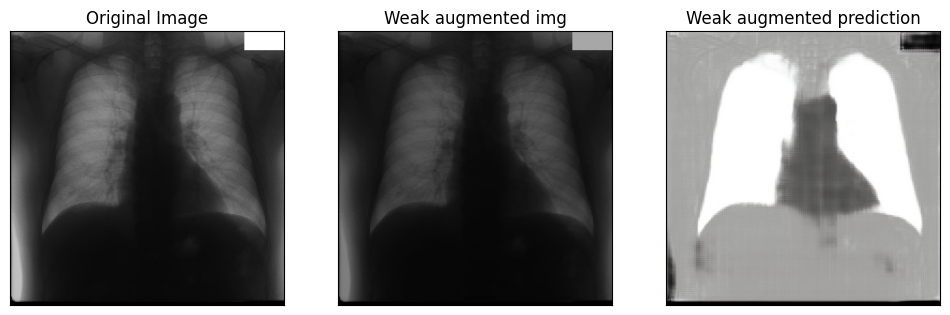

In [24]:
img1=test_images[0]
img2=weak_augmented_imgs[0]
img3=weak_predictions[0]

cv2.imwrite("inp_weak.jpg",img1*255)
cv2.imwrite("augmented_weak.jpg",img2*255)
cv2.imwrite("augmented_weak_pred.jpg",img3*255)

x1=cv2.imread("inp_weak.jpg")
x2=cv2.imread("augmented_weak.jpg")
x3=cv2.imread("augmented_weak_pred.jpg")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].imshow(x1)
axs[0].set_title('Original Image')
axs[1].imshow(x2)
axs[1].set_title('Weak augmented img')
axs[2].imshow(x3, cmap='gray')
axs[2].set_title('Weak augmented prediction')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(str(sample_idx)+".jpg")

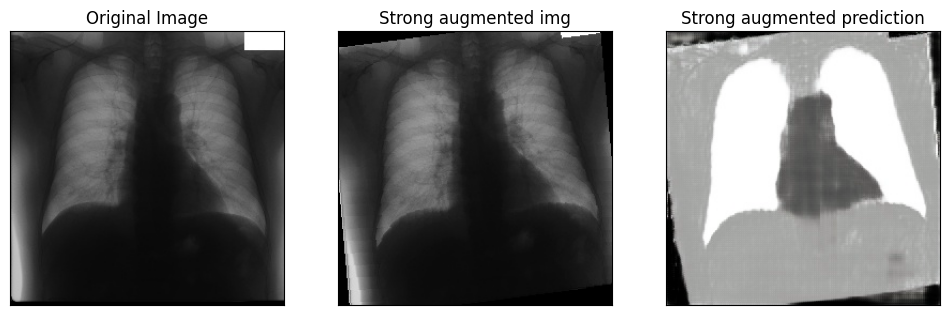

In [25]:
img1=test_images[0]
img2=strong_augmented_imgs[0]
img3=strong_predictions[0]

cv2.imwrite("inp_strong.jpg",img1*255)
cv2.imwrite("augmented_strong.jpg",img2*255)
cv2.imwrite("augmented_strong_pred.jpg",img3*255)

x1=cv2.imread("inp_strong.jpg")
x2=cv2.imread("augmented_strong.jpg")
x3=cv2.imread("augmented_strong_pred.jpg")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].imshow(x1)
axs[0].set_title('Original Image')
axs[1].imshow(x2)
axs[1].set_title('Strong augmented img')
axs[2].imshow(x3, cmap='gray')
axs[2].set_title('Strong augmented prediction')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(str(sample_idx)+".jpg")

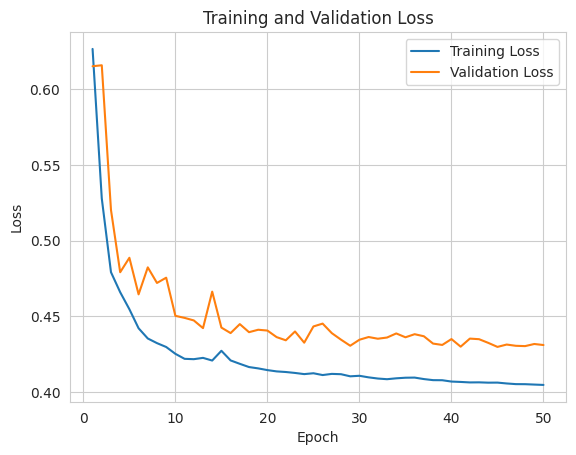

In [ ]:
# create a Pandas DataFrame to store the train and validation loss values
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'Epoch': range(1, n_epochs+1), 
                   'Train Loss': train_losses,
                   'Val Loss': val_losses})

# plot the train and validation loss using Seaborn's lineplot function
sns.set_style("whitegrid")
sns.lineplot(data=df, x='Epoch', y='Train Loss', label='Training Loss')
sns.lineplot(data=df, x='Epoch', y='Val Loss', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

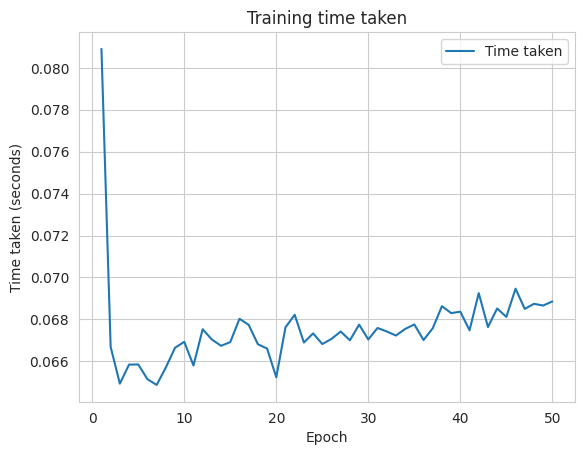

In [28]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'Epoch': range(1, n_epochs+1), 
                   'Time taken': time_taken})

# plot the train and validation loss using Seaborn's lineplot function
sns.set_style("whitegrid")
sns.lineplot(data=df, x='Epoch', y='Time taken', label='Time taken')
plt.title('Training time taken')
plt.xlabel('Epoch')
plt.ylabel('Time taken (seconds)')
plt.show()

In [29]:
# using reference guiding for pseudo labelling

model.eval()

train_feats=[]

for i,img in enumerate(X_train1):
  with torch.no_grad():
      input_tensor = X_train1[i].unsqueeze(0)
      input_tensor = input_tensor.float()  # convert input tensor to float
      input_tensor = input_tensor.to(device)
      
      output,feats = model(input_tensor) # get feats for test images
      feats=feats.view(1,-1).squeeze().cpu().numpy()
      train_feats.append(feats)

train_feats=np.array(train_feats)

print(train_feats.shape)

(199, 131072)


In [30]:
# using reference guiding for pseudo labelling

model.eval()

test_feats=[]
weak_feats=[]
strong_feats=[]

for i,img in enumerate(X_test1):
  with torch.no_grad():
      input_tensor = X_test1[i].unsqueeze(0)
      input_tensor = input_tensor.float()  # convert input tensor to float
      input_tensor = input_tensor.to(device)
      weak_augmented_img = weak_augmentation(input_tensor)
      strong_augmented_img = strong_augmentation(input_tensor)
      
      output,feats = model(input_tensor) # get feats for test images
      feats=feats.view(1,-1).squeeze().cpu().numpy()
      test_feats.append(feats)

      output,feats = model(weak_augmented_img) # get feats for weak augmented images
      feats=feats.view(1,-1).squeeze().cpu().numpy()
      weak_feats.append(feats)

      output,feats = model(strong_augmented_img) # get feats for strong augmented images
      feats=feats.view(1,-1).squeeze().cpu().numpy()
      strong_feats.append(feats)   

test_feats=np.array(test_feats)
weak_feats=np.array(weak_feats)
strong_feats=np.array(strong_feats)

print(test_feats.shape)
print(weak_feats.shape)
print(strong_feats.shape)

(48, 131072)
(48, 131072)
(48, 131072)


In [31]:
import torch.nn.functional as F
from scipy.spatial.distance import cdist

k=5


def reference_guiding(feat, pool, indices):
    distances = cdist(pool, feat.reshape(1, -1), metric='cosine')
    nearest_idx = indices[distances.argmin()]
    return nearest_idx

pseudo_labels=[]

for i,feat in enumerate(test_feats):
  inds=np.random.randint(0,len(train_feats),k)
  pool=train_feats[inds]
  pseudo_label=reference_guiding(feat, pool, inds)
  pseudo_labels.append(pseudo_label)


In [32]:
pseudo_labels

[193,
 47,
 194,
 197,
 149,
 197,
 175,
 6,
 26,
 94,
 147,
 18,
 31,
 46,
 38,
 66,
 117,
 198,
 17,
 182,
 163,
 22,
 149,
 75,
 158,
 139,
 158,
 17,
 146,
 89,
 104,
 1,
 191,
 74,
 2,
 105,
 87,
 14,
 174,
 65,
 140,
 181,
 9,
 108,
 17,
 59,
 12,
 177]

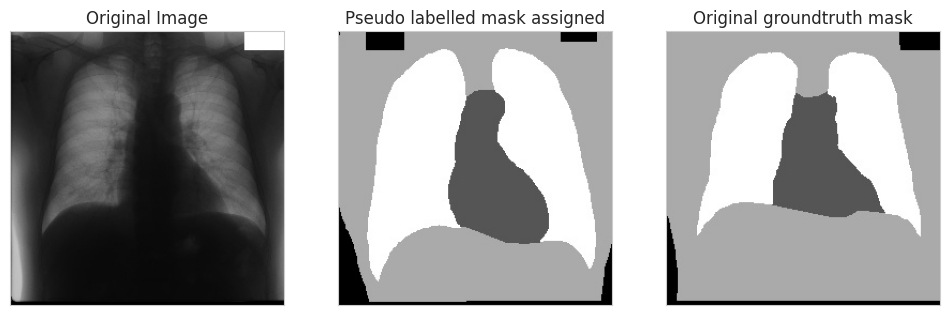

In [37]:

img1=test_images[0]
img2=y_train1[pseudo_labels[0]]
img3=y_test1[0]


img2 = torch.transpose(img2, 0, 2).squeeze().cpu()
img2=img2.numpy()

img3 = torch.transpose(img3, 0, 2).squeeze().cpu()
img3=img3.numpy()


cv2.imwrite("inp1.jpg",img1*255)
cv2.imwrite("pseudo1.jpg",img2*255)
cv2.imwrite("org1.jpg",img3*255)

x1=cv2.imread("inp1.jpg")
x2=cv2.imread("pseudo1.jpg")
x3=cv2.imread("org1.jpg")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].imshow(x1)
axs[0].set_title('Original Image')
axs[1].imshow(x2)
axs[1].set_title('Pseudo labelled mask assigned')
axs[2].imshow(x3, cmap='gray')
axs[2].set_title('Original groundtruth mask')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(str(sample_idx)+".jpg")

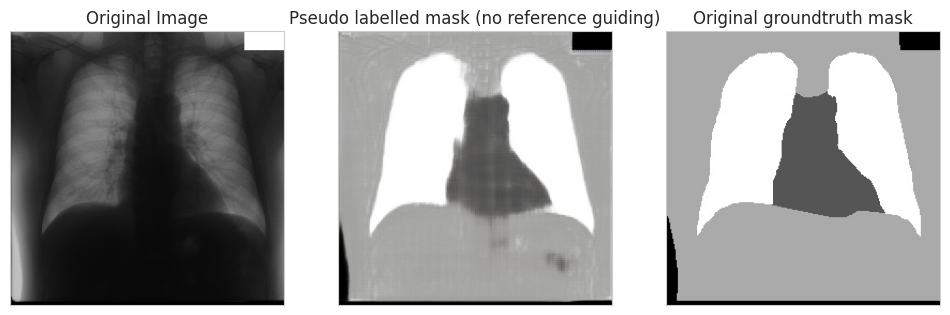

In [39]:
#ablations (results without reference guiding pseudo labelling)


img1=test_images[0]
img2=predictions[0]
img3=y_test1[0]


#img2 = torch.transpose(img2, 0, 2).squeeze().cpu()
#img2=img2.numpy()

img3 = torch.transpose(img3, 0, 2).squeeze().cpu()
img3=img3.numpy()


cv2.imwrite("inp1.jpg",img1*255)
cv2.imwrite("pseudo1.jpg",img2*255)
cv2.imwrite("org1.jpg",img3*255)

x1=cv2.imread("inp1.jpg")
x2=cv2.imread("pseudo1.jpg")
x3=cv2.imread("org1.jpg")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].imshow(x1)
axs[0].set_title('Original Image')
axs[1].imshow(x2)
axs[1].set_title('Pseudo labelled mask (no reference guiding)')
axs[2].imshow(x3, cmap='gray')
axs[2].set_title('Original groundtruth mask')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(str(sample_idx)+".jpg")

In [ ]:
#deeplabV3 segmentation experiment

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.models.segmentation.deeplabv3 import DeepLabHead, DeepLabV3
from torchvision import transforms
from torchvision.models.segmentation import deeplabv3_resnet50

train_dataset = MyDataset(X_train1, y_train1)
test_dataset = MyDataset(X_test1, y_test1)

# Define your dataloader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Move the model to the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from torchvision import models

model = models.segmentation.deeplabv3_resnet50(pretrained=True, progress=True)
num_classes = 3
model.classifier = nn.Sequential(
    nn.Conv2d(2048, num_classes, kernel_size=(1, 1), stride=(1, 1)),
    nn.Sigmoid(),
)

criterion = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
model.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
# Define the training loop
n_epochs = 50
train_losses=[]
val_losses=[]

for epoch in range(n_epochs):
    train_loss = 0.0
    model.train()
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.float()  # convert input tensor to float
        targets = targets.float()  # convert input tensor to float
        
        optimizer.zero_grad()
        outputs = model(inputs)['out']
        
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, train_loss))

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            inputs = inputs.float()  # convert input tensor to float
            targets = targets.float()  # convert input tensor to float
        
            outputs = model(inputs)['out']
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    val_losses.append(test_loss)
    print('Test Loss: {:.4f}'.format(test_loss))


Epoch: 1, Training Loss: 0.4739
Test Loss: 0.4564
Epoch: 2, Training Loss: 0.4310
Test Loss: 0.4417
Epoch: 3, Training Loss: 0.4276
Test Loss: 0.4392
Epoch: 4, Training Loss: 0.4258
Test Loss: 0.4386
Epoch: 5, Training Loss: 0.4250
Test Loss: 0.4381
Epoch: 6, Training Loss: 0.4238
Test Loss: 0.4367
Epoch: 7, Training Loss: 0.4228
Test Loss: 0.4389
Epoch: 8, Training Loss: 0.4226
Test Loss: 0.4365
Epoch: 9, Training Loss: 0.4220
Test Loss: 0.4363
Epoch: 10, Training Loss: 0.4215
Test Loss: 0.4355
Epoch: 11, Training Loss: 0.4212
Test Loss: 0.4368
Epoch: 12, Training Loss: 0.4212
Test Loss: 0.4366
Epoch: 13, Training Loss: 0.4212
Test Loss: 0.4372
Epoch: 14, Training Loss: 0.4238
Test Loss: 0.6348
Epoch: 15, Training Loss: 0.4306
Test Loss: 0.4689
Epoch: 16, Training Loss: 0.4279
Test Loss: 0.4394
Epoch: 17, Training Loss: 0.4253
Test Loss: 0.4373
Epoch: 18, Training Loss: 0.4233
Test Loss: 0.4373
Epoch: 19, Training Loss: 0.4224
Test Loss: 0.4363
Epoch: 20, Training Loss: 0.4218
Test Lo

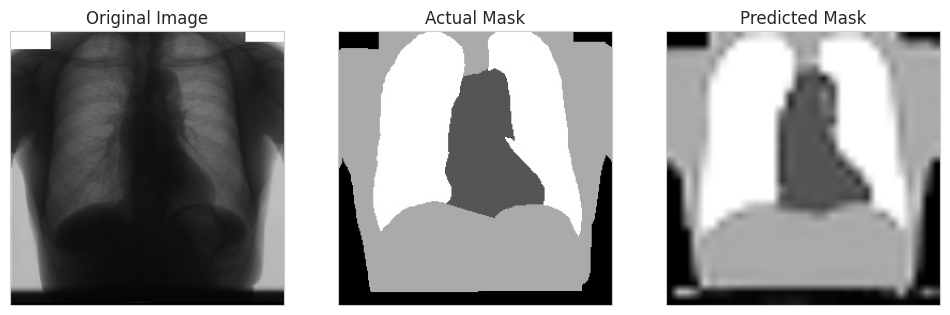

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a sample image from the test dataset
sample_idx = 10

# Generate prediction using the trained model
model.eval()
with torch.no_grad():
    input_tensor = X_test1[sample_idx].unsqueeze(0)
    input_tensor = input_tensor.float()  # convert input tensor to float
    input_tensor = input_tensor.to(device)
    output = model(input_tensor)['out']
    input_tensor=torch.transpose(input_tensor, 1, 3).squeeze().cpu().numpy()
    output = torch.transpose(output, 1, 3).squeeze().cpu()
    out=output.numpy()
    
    predicted_mask=out
    target_mask=y_test2[sample_idx].cpu().numpy()
    
cv2.imwrite("inp.jpg",input_tensor*255)
cv2.imwrite("target.jpg",target_mask*255)
cv2.imwrite("pred.jpg",predicted_mask*255)

x1=cv2.imread("inp.jpg")
x2=cv2.imread("target.jpg")
x3=cv2.imread("pred.jpg")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].imshow(x1)
axs[0].set_title('Original Image')
axs[1].imshow(x2)
axs[1].set_title('Actual Mask')
axs[2].imshow(x3, cmap='gray')
axs[2].set_title('Predicted Mask')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(str(sample_idx)+"_v3.jpg")

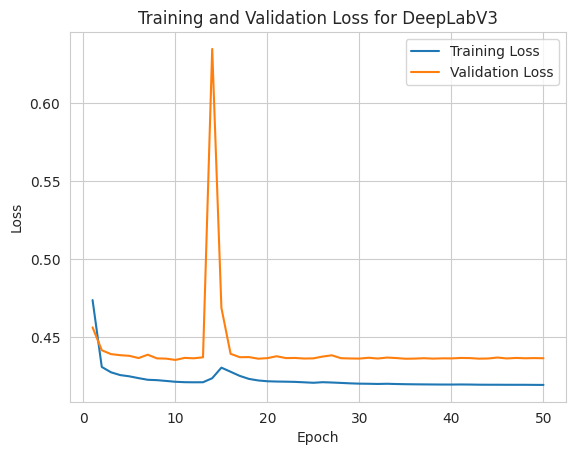

In [ ]:
# create a Pandas DataFrame to store the train and validation loss values
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'Epoch': range(1, n_epochs+1), 
                   'Train Loss': train_losses,
                   'Val Loss': val_losses})

# plot the train and validation loss using Seaborn's lineplot function
sns.set_style("whitegrid")
sns.lineplot(data=df, x='Epoch', y='Train Loss', label='Training Loss')
sns.lineplot(data=df, x='Epoch', y='Val Loss', label='Validation Loss')
plt.title('Training and Validation Loss for DeepLabV3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()